In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics

In [75]:
df = pd.read_csv("student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [76]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


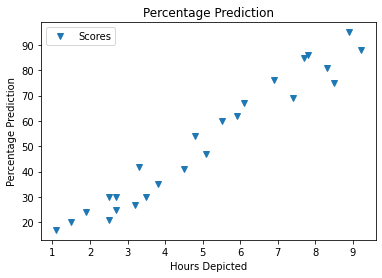

In [77]:
df.plot(x='Hours', y='Scores', style='v')  
plt.title('Percentage Prediction')  
plt.xlabel('Hours Depicted')  
plt.ylabel('Percentage Prediction')  
plt.show()

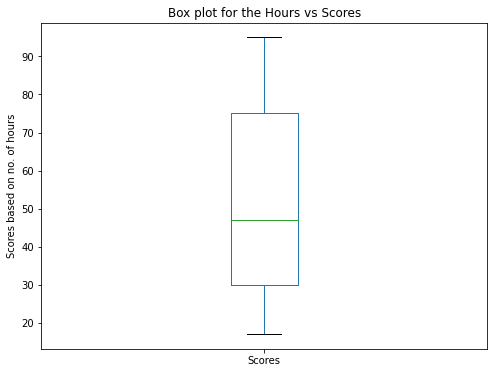

In [78]:
df_scores = df['Scores']
df_scores.plot(kind='box', figsize=(8, 6))
plt.title('Box plot for the Hours vs Scores')
plt.ylabel('Scores based on no. of hours')
plt.show()

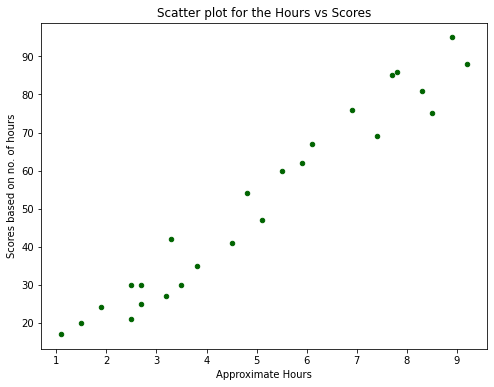

In [79]:
df.plot(kind='scatter', x='Hours', y='Scores', figsize=(8, 6), color='darkgreen')
plt.title('Scatter plot for the Hours vs Scores')
plt.xlabel('Approximate Hours')
plt.ylabel('Scores based on no. of hours')
plt.show()

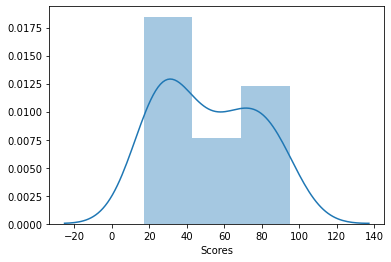

In [80]:
#sns.distplot(df['Hours'])
sns.distplot(df['Scores'])

C:\Users\Admin\anaconda3\envs\venv\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


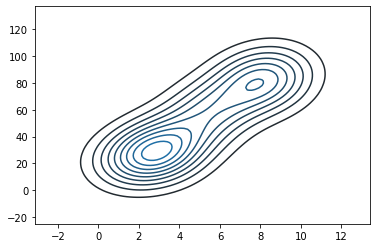

In [81]:
sns.kdeplot(df);

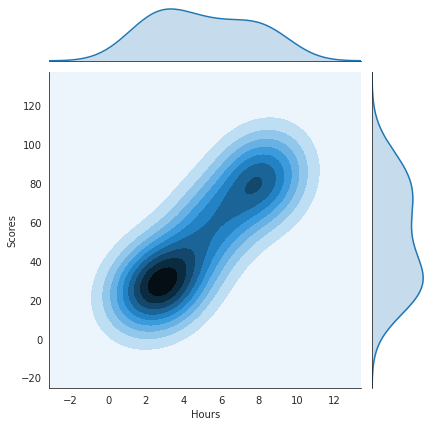

In [82]:
with sns.axes_style('white'):
    sns.jointplot("Hours", "Scores", df, kind='kde');

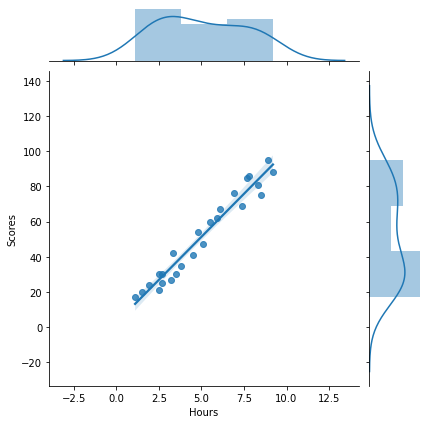

In [83]:
sns.jointplot("Hours", "Scores", df, kind='reg');

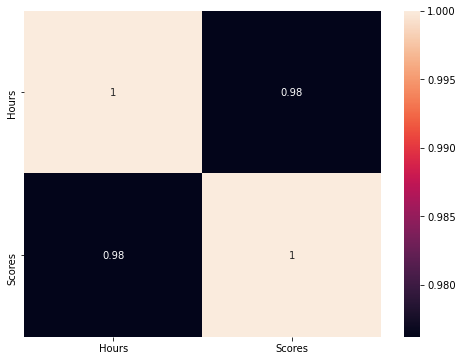

In [84]:
corre=df.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
#plt.show()
sns.heatmap(data=corre,annot=True)

In [85]:
correlations=df.corr(method='pearson')
print(correlations)

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [86]:
import scipy.stats as stats
skewvalue=df['Scores'].skew()
print("skew value is",skewvalue)
kur=df['Scores'].kurt()
print("kurtosis values is ",kur)
#  kur<3-left skewed
#  kur>3-right skewed
#  kur==3-normal curve#


skew value is 0.2339646665397317
kurtosis values is  -1.4438326250947935


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [88]:
x = df[['Hours']].values
y = df[['Scores']].values
x_train, x_test, y_train, y_test= train_test_split(x, y,train_size=0.70,test_size=0.30,random_state=42)

In [89]:
linearRegressor= LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predict= linearRegressor.predict(x_train)

In [90]:
print("Accuracy of Training LR -",linearRegressor.score(x_train, y_train)*100)
print("Accuracy of Testing LR - ",linearRegressor.score(x_test, y_test)*100)

Accuracy of Training LR - 95.36486503889446
Accuracy of Testing LR -  94.87647340257011


In [91]:
print('Percentage Prediction for corresponding hours entered:-',linearRegressor.predict([[5.5]]))
print('Percentage Prediction for corresponding hours entered:-',linearRegressor.predict([[8.7]]))
print('Percentage Prediction for corresponding hours entered:-',linearRegressor.predict([[9.25]]))

Percentage Prediction for corresponding hours entered:- [[56.20217183]]
Percentage Prediction for corresponding hours entered:- [[87.27590282]]
Percentage Prediction for corresponding hours entered:- [[92.61670034]]


In [94]:
print('Intercept is:',linearRegressor.intercept_)

Intercept is: [2.79419668]


In [95]:
print('Coefficient is:',linearRegressor.coef_)

Coefficient is: [[9.71054094]]


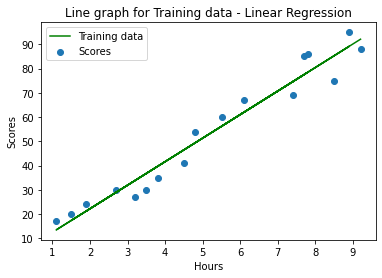

In [99]:
plt.scatter(x_train,y_train,label='Scores')
plt.plot(x_train,linearRegressor.predict(x_train),color='green', label='Training data')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Line graph for Training data - Linear Regression')
plt.legend()
plt.show()